# Lojistik Regresyon

**Kütüphanelerin İçe Aktarılması**

In [1]:
import pickle

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

from mergen import StringAnalyzer

**Verinin Yüklenmesi**

In [2]:
data = pd.read_csv("teknofest_train_final.csv", sep="|", encoding="utf-8")
data = data[['text', 'target']]
data.head()

,text,target
0,çürük dişli,INSULT
1,Bu adamın islama ve müslümanlara verdiği zarar...,RACIST
2,erkekler zora gelmez,SEXIST
3,Utanmazın götüne kazık sokmuşlar bu tıkırtı ne...,PROFANITY
4,otomasyon< sistemlerine= doğrudan bağlanabilir,OTHER


**Metin Ön İşleme**

In [3]:
string_analyzer = StringAnalyzer(data=data, columns='text')
data = string_analyzer.dataframe_analyze()
data.head()

,text,target
0,çürük dişli,INSULT
1,adamın islama müslümanlara verdiği zararı gavu...,RACIST
2,erkekler zora gelmez,SEXIST
3,utanmazın götüne kazık sokmuşlar tıkırtı geliy...,PROFANITY
4,otomasyon sistemlerine doğrudan bağlanabilir,OTHER


**Modelin Sayısallaştırılması ve Eğitim, Test Olarak Ayrılması**

In [4]:
# Metin verilerinin sayısallaştırılması
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['text'])
y = data['target']

In [5]:
from sklearn.model_selection import train_test_split

# Eğitim ve test verilerinin ayrılması
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.1, random_state=42)

**Modelin Eğitilmesi**

In [6]:
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg')
lr.fit(X_train_, y_train_)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

**Modelin Test Edilmesi ve Grafik**

In [7]:
from sklearn.metrics import f1_score
# Test verilerinin tahmini
y_pred = lr.predict(X_test_)
# F1 skoru hesaplama
f1 = f1_score(y_test_, y_pred, average='weighted')
print("F1 score:", f1)

F1 score: 0.7969368227951243


In [8]:
# Test verileri üzerinde tahmin işlemi yap
y_pred = lr.predict(X_test_)

# Sınıflandırma raporunu göster
print(classification_report(y_test_, y_pred))

              precision    recall  f1-score   support

      INSULT       0.71      0.73      0.72       240
       OTHER       0.69      0.86      0.76       378
   PROFANITY       0.96      0.81      0.88       226
      RACIST       0.90      0.70      0.79       207
      SEXIST       0.91      0.82      0.86       211

    accuracy                           0.79      1262
   macro avg       0.83      0.78      0.80      1262
weighted avg       0.81      0.79      0.80      1262



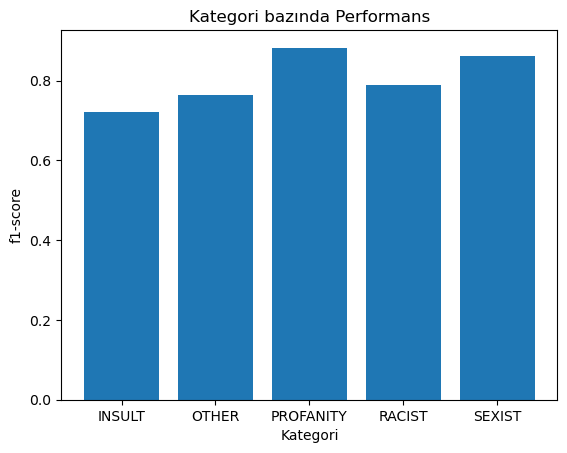

In [9]:
# Test verileri üzerinde tahmin işlemi yap
y_pred = lr.predict(X_test_)

# Kategorileri al
categories = np.unique(y_test_)

# Her kategori için f1-score hesapla
f1_scores = [f1_score(y_test_, y_pred, labels=[category], average='weighted') for category in categories]

# Bar grafiğini oluştur
plt.bar(categories, f1_scores)
plt.xlabel('Kategori')
plt.ylabel('f1-score')
plt.title('Kategori bazında Performans')
plt.show()

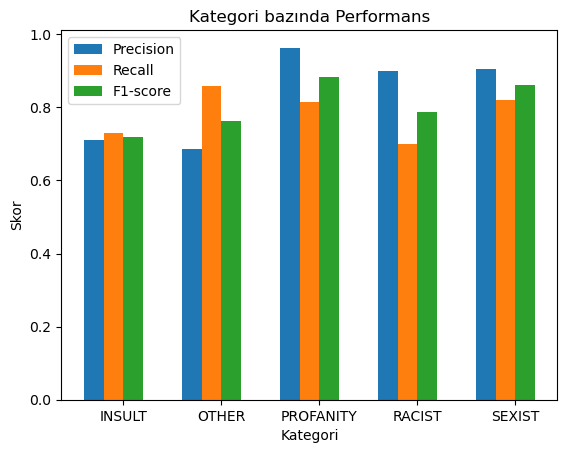

In [10]:
# Test verileri üzerinde tahmin işlemi yap
y_pred = lr.predict(X_test_)

# Kategorileri al
categories = np.unique(y_test_)

# Her kategori için sınıflandırma raporunu hesapla
reports = [classification_report(y_test_, y_pred, labels=[category], output_dict=True) for category in categories]

# Performans metriklerini al
precision = [reports[i][str(categories[i])]['precision'] for i in range(len(categories))]
recall = [reports[i][str(categories[i])]['recall'] for i in range(len(categories))]
f1_score = [reports[i][str(categories[i])]['f1-score'] for i in range(len(categories))]
#support = [reports[i][str(categories[i])]['support'] for i in range(len(categories))]

# Bar grafiğini oluştur
x = np.arange(len(categories))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - 1.5*width, precision, width, label='Precision')
rects2 = ax.bar(x - 0.5*width, recall, width, label='Recall')
rects3 = ax.bar(x + 0.5*width, f1_score, width, label='F1-score')
#rects4 = ax.bar(x + 1.5*width, support, width, label='Support')

# Eksenleri ayarla
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Grafiği göster
plt.xlabel('Kategori')
plt.ylabel('Skor')
plt.title('Kategori bazında Performans')
plt.show()

**Modelin Metin Verileri Üzerinden Test Edilmesi**

In [11]:
# Test işleminin gerçekleştirilmesi
def test(text):
    # Önişleme işlemi
    text = StringAnalyzer(sentence=text).sentence_analyze()
    # Sayısallaştırma işlemi
    X_test = vectorizer.transform([text])
    # Tahmin işlemi
    y_pred = lr.predict(X_test)
    return y_pred[0]

In [12]:
text = "Bu örnek bir metindir."
print(test(text))

OTHER


In [13]:
text1 = "Türkiye Cumhuriyeti Devleti 14 Mayıs 2023 tarihinde Seçime gitmektedir."
text2 = "Kadınlar ülke bile yönetemezler"
text3 = "Çirkin bir insansın sen"
text4 = "Suriyeli erkekler kızlarımıza askıntılık etmektedirler."
print(test(text=text1))
print(test(text=text2))
print(test(text=text3))
print(test(text=text4))

OTHER
SEXIST
INSULT
RACIST
